Loading data

In [3]:
import pandas as pd
import sys  
sys.path.insert(0, '../scripts')
import clean_data
import utilities
import norm_scaling

In [4]:
#loading file function
def load_csv(path):
    df = pd.read_csv(path,engine='python',error_bad_lines=False, na_values=['?', None,'-','--','undefined'])
    return df

In [5]:
#loaded file
df= load_csv('../data/data.csv')

/home/dibora/User-Analytics-in-the-Telecommunication-Industry/venv_usr_analytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


In [6]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [7]:
cleaned_data = clean_data.Handle_missing_values(df)
cleaned_data.isnull().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


after loading and cleaning the data now we will do our eda on User engagement, to understand how well the users engage on the available applications. We need to determine the level of engagement of a random user for any application. To do that we will focus on the following "sessions frequency", "the duration of the session" and "the sessions total traffic (download and upload (bytes))". We will do analysis on these variables, normalize them and then cluster users using these metrics, so it will be easier to provide a more customized service for each user.


First step is Doing EDA on the variables

In [8]:
# groups users based on their MSIDN number and count how many sessions they created
cleaned_copy = cleaned_data.copy()
df_user = cleaned_copy.groupby("MSISDN/Number")

# count session id for session freq, sum up session duration, 
df_session_freq = pd.DataFrame(df_user["Bearer Id"].count())
df_session_dur = pd.DataFrame(df_user["Dur. (ms)"].sum())
df_session_UL = pd.DataFrame(df_user["Total UL (Bytes)"].sum())
df_session_DL = pd.DataFrame(df_user["Total DL (Bytes)"].sum())
df_session_DL.drop_duplicates()
df_session_UL.drop_duplicates
print("Top 10 users with high session frequency")
df_session_freq.sort_values(by=["Bearer Id"], ascending=False).head(10)


Top 10 users with high session frequency


,Bearer Id
MSISDN/Number,
"33,626,320,676.00",18
"33,625,779,332.00",17
"33,614,892,860.00",17
"33,659,725,664.00",16
"33,675,877,202.00",15
"33,760,536,639.00",15
"33,667,163,239.00",13
"33,760,413,819.00",12
"33,604,515,716.00",12


In [9]:
# duration of sessions per user
print("Top 10 users with high session duration")
df_session_dur.sort_values(by="Dur. (ms)",ascending=False).head(10)

Top 10 users with high session duration


,Dur. (ms)
MSISDN/Number,
"33,625,779,332.00","18,553,754.00"
"33,614,892,860.00","9,966,898.00"
"33,760,536,639.00","9,279,434.00"
"33,626,320,676.00","8,791,927.00"
"33,667,163,239.00","8,744,914.00"
"33,662,840,755.00","6,614,270.00"
"33,664,693,736.00","6,288,730.00"
"33,603,127,838.00","6,287,761.00"
"33,667,456,716.00","5,649,882.00"


In [10]:
# total data DL volume per user
print("Top 10 users with high data DL volume")
df_session_DL.sort_values(by="Total DL (Bytes)",ascending=False).head(10)

Top 10 users with high data DL volume


,Total DL (Bytes)
MSISDN/Number,
"33,614,892,860.00","8,156,743,493.00"
"33,760,536,639.00","7,811,295,382.00"
"33,625,779,332.00","7,770,043,342.00"
"33,675,877,202.00","7,309,541,816.00"
"33,626,320,676.00","7,301,516,540.00"
"33,659,725,664.00","7,081,602,462.00"
"33,666,464,084.00","6,903,439,962.00"
"33,760,413,819.00","6,610,851,624.00"
"33,664,712,899.00","6,400,773,755.00"


In [11]:
# total UL data volume per user
print("Top 10 users with high data UL volume")
df_session_UL.sort_values(by="Total UL (Bytes)",ascending=False).head(10)

Top 10 users with high data UL volume


,Total UL (Bytes)
MSISDN/Number,
"33,625,779,332.00","729,577,380.00"
"33,760,536,639.00","703,478,581.00"
"33,614,892,860.00","689,483,001.00"
"33,626,320,676.00","669,650,721.00"
"33,659,725,664.00","624,260,321.00"
"33,675,877,202.00","581,568,792.00"
"33,667,163,239.00","566,326,364.00"
"33,698,792,269.00","530,343,105.00"
"33,760,413,819.00","521,518,890.00"


In [12]:
# user engagment metrics per user
df_user_engagement = pd.DataFrame({"session_freq": df_session_freq["Bearer Id"],"session_duration":df_session_dur["Dur. (ms)"],"session_data_DL": df_session_DL["Total DL (Bytes)"],"session_data_UL": df_session_UL["Total UL (Bytes)"]})
df_user_engagement.head(10)

,session_freq,session_duration,session_data_DL,session_data_UL
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00"
"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00"
"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00"
"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00"
"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00"
"33,601,010,682.00",2,"253,983.00","555,207,972.00","60,009,249.00"
"33,601,011,634.00",2,"128,360.00","553,041,208.00","101,681,858.00"
"33,601,011,959.00",1,"86,399.00","294,085,078.00","38,575,279.00"
"33,601,014,694.00",2,"495,702.00","896,560,173.00","93,572,016.00"


# Modeling
Now we have got some intuition about our data regarding user engagement lets normalize and cluster them.
To give all data points equal importance, we used minmax scaler to scale continuous features

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [14]:
normalized_data_freq = norm_scaling.normalize(df_session_freq)
normalized_data_dur = norm_scaling.normalize(df_session_dur)
normalized_data_UL = norm_scaling.normalize(df_session_DL)
normalized_data_DL = norm_scaling.normalize(df_session_UL)
X = np.hstack((normalized_data_freq,normalized_data_dur,normalized_data_DL,normalized_data_UL))
X = norm_scaling.normalize(X)


Run a k-means (k=3) to classify customers in three groups of engagement.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pickle

In [18]:
# X is nsamples x mfeatures
# X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 8)
kmeans = KMeans(n_clusters=3).fit_predict(X)
pickle.dump(kmeans, open("../models/user_engag_model.pkl", 'wb'))
X.shape

(106856, 4)

In [61]:
# y_pred = kmeans.predict(X_test)
# y_pred.shape,y_pred[:5]

Find the min,max and average of each metrics for each cluster

In [18]:
# organizing datapoints per cluster
un_normalized_data = df_user_engagement.to_numpy()
clusters = {}
cluster_no = 3
container = []
for i in range(0,cluster_no):
    for x,y in zip(un_normalized_data,kmeans):    
        if y == i:
            container.append(x)
    clusters["cluster_"+str(i)] = np.array(container)
    container = []


In [19]:
# printing information for each cluster
metrics = 4
metrics_name = ["Session_freq","session_dur","total_dl","total_ul"]
for i in range(3):
    for metric in range(0,metrics):
        data_cluster = clusters["cluster_"+str(i)][:,metric]
        print("min of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.min())
        print("max of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.max())
        print("avg of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.mean())

min of cluster 0, Session_freq 0.0
max of cluster 0, Session_freq 4.0
avg of cluster 0, Session_freq 2.1559906639004147
min of cluster 0, session_dur 18235.0
max of cluster 0, session_dur 3174824.0
avg of cluster 0, session_dur 211025.369813278
min of cluster 0, total_dl 89864252.0
max of cluster 0, total_dl 2165972065.0
avg of cluster 0, total_dl 996077649.1098721
min of cluster 0, total_ul 25897887.0
max of cluster 0, total_ul 197644172.0
avg of cluster 0, total_ul 89311018.97765388
min of cluster 1, Session_freq 0.0
max of cluster 1, Session_freq 2.0
avg of cluster 1, Session_freq 1.018231849822833
min of cluster 1, session_dur 7142.0
max of cluster 1, session_dur 1573420.0
avg of cluster 1, session_dur 105381.36310406352
min of cluster 1, total_dl 8827082.0
max of cluster 1, total_dl 1086105000.0
avg of cluster 1, total_dl 453902527.1687106
min of cluster 1, total_ul 2866892.0
max of cluster 1, total_ul 108187386.0
avg of cluster 1, total_ul 41755009.65164728
min of cluster 2, Sess

From finding top users based on the metrics, we found that the top 3 UL values are 729,577,380.00, 703,478,581.00 and 689,483,001.00. the top 3 DL values are 8,156,743,493.00 ,7,811,295,382.00 and 7,770,043,342.00. the top 3 session durations are 18,553,754.00 ,	9,966,898.00 and 9,279,434.00. Finally the top 3 session frequencies are 18, 17 and 16. Therefore, from this information we can deduce that, cluster 0 contains users with low engagement, cluster 2 contains users with the highest engagement and cluster 1 contains users with average engagement.


Now we aggregate application data for each user


In [22]:
#Aggregate user total traffic per application and derive the top 10 most engaged users per application
app_names = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
agg_df_DL = {app_name: utilities.find_agg(cleaned_data,'MSISDN/Number',app_name+' DL (Bytes)' , 'sum', "   DL (Bytes) of "+app_name+" user", 10, order=False ).reset_index() for app_name in app_names}
agg_df_UL = {app_name: utilities.find_agg(cleaned_data,'MSISDN/Number',app_name+' UL (Bytes)' , 'sum', "   UL (Bytes) of "+app_name+" user", 10, order=False ).reset_index() for app_name in app_names}


In [23]:
for app_name in app_names:
    print("Top 10 engaged users for ",app_name)
    print(agg_df_DL[app_name],"\n")


Top 10 engaged users for  Social Media
    index     MSISDN/Number     DL (Bytes) of Social Media user
0   13526 33,626,320,676.00                       42,743,837.00
1   92923 33,760,536,639.00                       39,297,646.00
2   37052 33,659,725,664.00                       34,900,444.00
3    6437 33,614,892,860.00                       27,749,744.00
4   13180 33,625,779,332.00                       26,564,121.00
5   65118 33,667,163,239.00                       23,753,753.00
6  106137 33,786,323,068.00                       23,568,655.00
7   70960 33,669,068,942.00                       23,477,047.00
8     666 33,603,127,838.00                       22,776,679.00
9   31331 33,658,490,784.00                       22,695,673.00 

Top 10 engaged users for  Google
    index     MSISDN/Number     DL (Bytes) of Google user
0   13526 33,626,320,676.00                116,106,455.00
1   13180 33,625,779,332.00                107,904,739.00
2    6437 33,614,892,860.00                 93,9

Plot the top 3 most used applications using appropriate charts.  To plot the top 3 most used applications, we will use the dl and ul volume of users. 


,Apps,total DL,total UL
0,Social Media,"269,300,061,368.77","4,939,298,085.43"
1,Google,"862,618,643,645.62","308,483,345,484.93"
2,Email,"268,761,121,931.87","70,106,483,664.44"
3,Youtube,"1,745,122,509,657.50","1,651,422,529,615.13"
4,Netflix,"1,744,039,384,662.72","1,650,274,224,700.82"
5,Gaming,"63,307,127,434,008.59","1,243,268,005,008.11"
6,Other,"63,165,502,729,718.20","1,239,728,178,463.42"


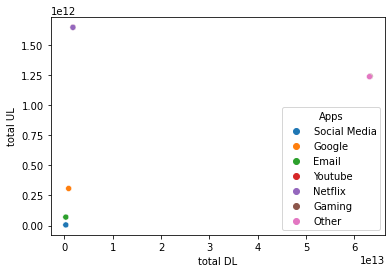

In [46]:
used_app_DL = {app_name: cleaned_data[app_name+" DL (Bytes)"].sum() for app_name in app_names}
used_app_UL = {app_name: cleaned_data[app_name+" UL (Bytes)"].sum() for app_name in app_names}
# used_app_UL = {app_name: cleaned_data[app_name+" UL (Bytes)"] for app_name in app_names}
df_used_apps = pd.DataFrame({"Apps":used_app_DL.keys(), "total DL": used_app_DL.values(), "total UL": used_app_UL.values()})

sn.scatterplot(data=df_used_apps, x="total DL",y="total UL", hue="Apps")
# df_used_apps["Total DL"]
# help(sn.scatterplot)
df_used_apps

Looks like the top 3 most used applications with Other, Gaming and YouTube.

Using the Elbow method to choose the best number for k, we will use inertia attribute to identify sum of squared distances of samples to the nearest cluster centre. We are looking for a value with optimized distance.

In [59]:
#using the elbow method to find the optimal K
inertias = []
K = range(1,10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X) 
    # calulating inertia of the model with different ks
    inertias.append(kmeanModel.inertia_)


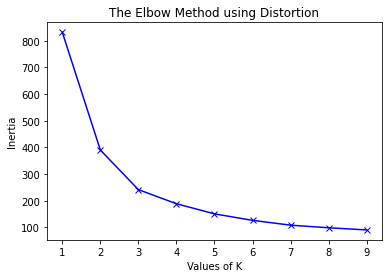

In [60]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

As seen from the graph the optimum value of k is 3. since sum of squared distances stop decreasing steepily after that point.